In [54]:
from data_storage import create_connection
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas_profiling import ProfileReport

In [55]:
connection = create_connection("../database/crypto_billionairs.db")

In [56]:
df = pd.read_sql_query('Select * from ETHTUSD_3m_complete_history', connection)

In [60]:
df["return"] = df['close'].pct_change(periods=480)

In [62]:
prof = ProfileReport(df)
prof.to_file(output_file='data_profile.html')

Summarize dataset:  92%|█████████▏| 24/26 [00:43<00:04,  2.04s/it, Get messages/warnings]                         C:\Users\janfa\Anaconda3\lib\site-packages\pandas_profiling\model\correlations.py:210: RuntimeWarning: invalid value encountered in greater_equal
  bool_index = abs(correlation_matrix.values) >= threshold
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 47.62it/s]


KeyboardInterrupt: 

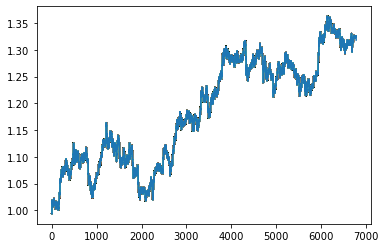

In [ ]:
# Plot indexed returns.
for i in range(len(df['return'])):
    plt.plot(np.cumprod(df['return'][:i]+1))
plt.legend()
plt.show()